# Assignment 3 (Solution)
## Programming for Data Science (BUAN 6340)

### <font color='red'>Due Date: Nov 17, 2019 11:59pm</font> 

Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Submit both .ipynb and .html files to the eLearning (you might need to compress them into one single file)


This assignment covers machine learning models


The total score: 100

In [1]:
NAME = "Vikrant Nakod"
Session = "BUAN6340.501 Fri 7:00pm-9:45pm"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Part I Prediction

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('daily_weather.csv')

## Daily Weather Data Description (60 points)

<br>
The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)

In [5]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [6]:
del data['number']
data = data.dropna()

In [7]:
# Binarize the relative_humidity_3pm to 0 or 1.

clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1

In [8]:
y = clean_data[['high_humidity_label']]
type(y)
y.shape

(1064, 1)

In [9]:
# Use 9am Sensor Signals as Features to Predict Humidity at 3pm

morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [10]:
X = clean_data[morning_features]

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)

**Complete the following tasks**:

- Train a logistic regression model (10 points)
- Train a SVM model by tunning both C and gamma, report the best parameters (15 points)
- Train a decision tree model by tuning the proper parameters, report the best parameters (15 points)
- Use the same parameters to train a random forest model (10 points)
- Compare all the above models' performance (10 points)


In [12]:
# YOUR CODES 

#1.LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))



lr.coef_: [[ 4.13493365e-03 -6.40103233e-02 -3.59932316e-04  9.70974982e-01
   8.79711412e-03 -9.07830815e-01  4.39765162e-02  3.85717050e-04]]
lr.intercept_: [0.06093482]
Training set score: 0.718
Test set score: 0.714


C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#2.SVM model

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

linear_svc = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X,y)

#define a list of parameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc = GridSearchCV(linear_svc, params_svc, cv=5, n_jobs=2,scoring = 'roc_auc', return_train_score=True)
grid_svc.fit(X_train, y_train)

print('train score: ', grid_svc.score(X_train, y_train))
print('test score: ', grid_svc.score(X_train, y_train))
print(grid_svc.best_params_)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))




train score:  0.7848584801935099
test score:  0.7848584801935099
{'C': 0.1}


C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.80


C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
from sklearn.svm import SVC
svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.001,0.001,0.1,1,10]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc_kernel.fit(X_train, y_train)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))
print(grid_svc_kernel.best_params_)

train score:  1.0
test score:  1.0
{'C': 1, 'gamma': 0.1}


C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#3.Train a decision tree model by tuning the proper parameters, report the best parameters



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.793


In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}



In [20]:
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))

      

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.793233082706767


In [23]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.32710073 0.24937433 0.15083731 0.05310292 0.13056785 0.06336139
 0.02565546 0.        ]


In [24]:
#4.same parameters to train a random forest model 

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

C:\Users\Home Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8082706766917294


In [25]:
#5.Compare all the above models' performance

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('RFC', RandomForestClassifier())
          ]

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10) #, #random_state=random_seed)
    results = model_selection.cross_val_score(model, X_test, y_test, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Home Laptop\Anaconda3\lib

LogReg| Mean=0.713818 STD=0.078685
SVM| Mean=0.657692 STD=0.079438
DecTree| Mean=0.751567 STD=0.078021
RFC| Mean=0.804701 STD=0.080129


C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

# Part II Clustering (40 points)

In [30]:
data = pd.read_csv('minute_weather.csv')

## Weather data

The **minute weather dataset** comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file **minute_weather.csv**, which is a comma-separated file.

As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [31]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [32]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [33]:
data.shape

(1587257, 13)

In [34]:
#Lots of rows, so let us sample down by taking every 10th row.
sampled_df = data[(data['rowID']%10) == 0]
sampled_df.shape

(158726, 13)

In [35]:
sampled_df = sampled_df.dropna()

In [36]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [37]:
select_df = sampled_df[features]

In [38]:
#Standardize the Features using StandardScaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48457779,  0.03247287, -0.1905634 , ...,  0.03826302,
        -0.66172102, -0.34710411],
       [-1.51734678,  0.1237468 , -0.65236961, ..., -0.44847591,
        -0.372321  ,  0.40839584],
       [-1.51734678,  0.06289752, -0.74682997, ..., -0.6539879 ,
        -0.41366386,  0.39313322],
       ...,
       [-0.30489432,  1.15818466,  1.90855574, ...,  2.03930084,
        -0.70306388,  0.01538324],
       [-0.30489432,  1.12776002,  2.06598967, ..., -1.67073143,
        -0.74440674, -0.04948292],
       [-0.30489432,  1.09733538, -1.6389556 , ..., -1.55175081,
        -0.62037816, -0.05711423]])

**Complete the following tasks**:

- Train a KMeans clustering model. (20 points)
- Visualize the differences of feature "air_temp" among different clusters. Any visualiztion types could be accepted.  (20 points)

Note: you should select a value of k, based on which you are able to observe differences among clusters.


In [39]:
# YOUR CODES
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline


In [40]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(select_df)
    Sum_of_squared_distances.append(km.inertia_)

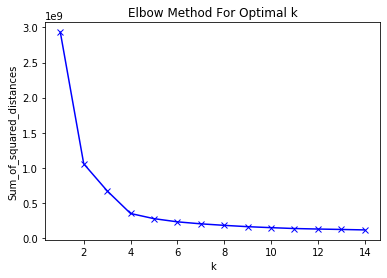

In [41]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
#as elbow in on 5, choosing k=5
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.93395723 -0.5975667   0.40959083  1.4583839   0.50418708  1.41007518
   0.7529767 ]
 [ 1.28996168 -0.20062584 -1.11475409  1.66441818 -1.01172407  1.76193269
  -1.10422091]
 [ 0.25845678  0.27497801 -1.25082695 -0.52495919 -1.10759569 -0.53617636
  -0.39436638]
 [-0.18738503 -0.99439975  0.4369284  -0.37241008  0.42248153 -0.36510635
   1.17331042]
 [ 0.0380593   0.71629649  0.71392556 -0.35207075  0.55605238 -0.3494408
  -0.52251037]]


In [47]:
centers = kmeans.cluster_centers_
centers

array([[-0.93395723, -0.5975667 ,  0.40959083,  1.4583839 ,  0.50418708,
         1.41007518,  0.7529767 ],
       [ 1.28996168, -0.20062584, -1.11475409,  1.66441818, -1.01172407,
         1.76193269, -1.10422091],
       [ 0.25845678,  0.27497801, -1.25082695, -0.52495919, -1.10759569,
        -0.53617636, -0.39436638],
       [-0.18738503, -0.99439975,  0.4369284 , -0.37241008,  0.42248153,
        -0.36510635,  1.17331042],
       [ 0.0380593 ,  0.71629649,  0.71392556, -0.35207075,  0.55605238,
        -0.3494408 , -0.52251037]])

In [48]:
def cluster_cen(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [51]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['r', 'g', 'b', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-5,+5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [50]:
P = cluster_cen(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.933957,-0.597567,0.409591,1.458384,0.504187,1.410075,0.752977,0
1,1.289962,-0.200626,-1.114754,1.664418,-1.011724,1.761933,-1.104221,1
2,0.258457,0.274978,-1.250827,-0.524959,-1.107596,-0.536176,-0.394366,2
3,-0.187385,-0.994400,0.436928,-0.372410,0.422482,-0.365106,1.173310,3
4,0.038059,0.716296,0.713926,-0.352071,0.556052,-0.349441,-0.522510,4


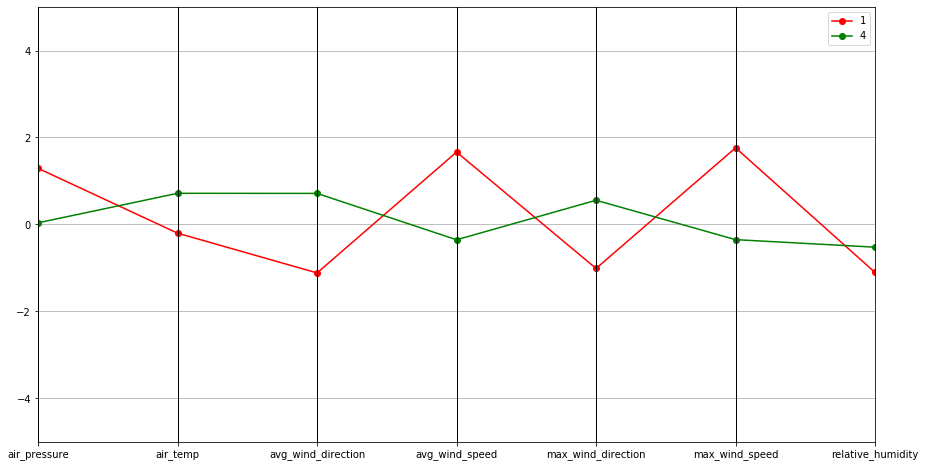

In [52]:
parallel_plot(P[P['relative_humidity'] < -0.5])

In [54]:
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,915.831170,60.636515,192.441016,3.188218,206.053524,3.811949,56.066684,0
1,918.181389,62.926217,44.882109,2.688125,62.317972,3.330880,35.862819,1
2,917.156284,63.122846,290.863554,1.712648,313.547863,2.309525,45.636867,2
3,917.449202,64.593609,341.291505,1.492899,21.113123,2.083384,42.310594,3


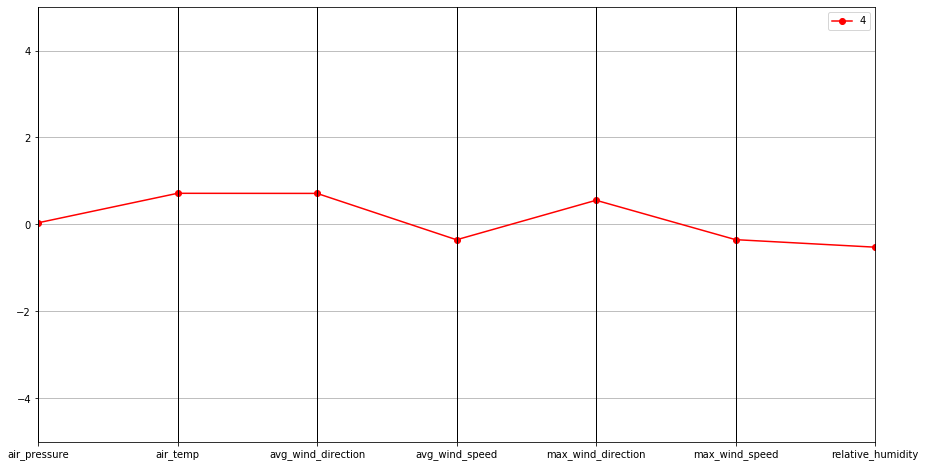

In [53]:
parallel_plot(P[P['air_temp'] > 0.5])

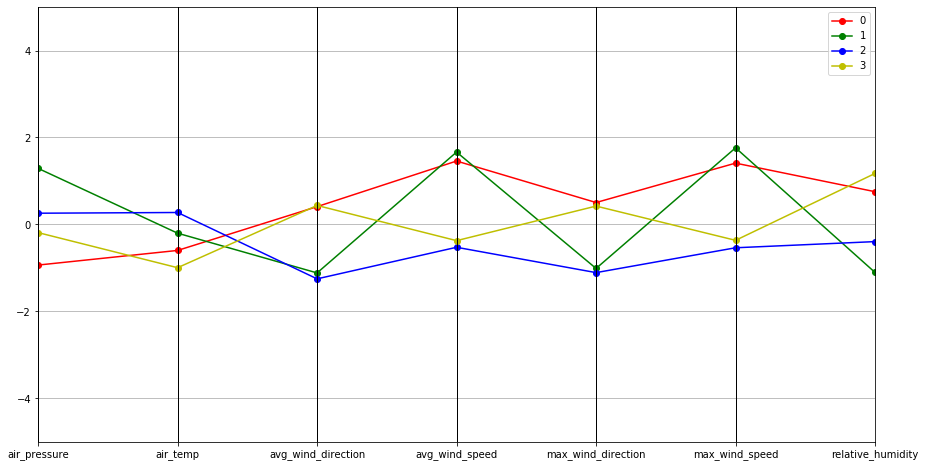

In [54]:
parallel_plot(P[P['air_temp'] < 0.5])

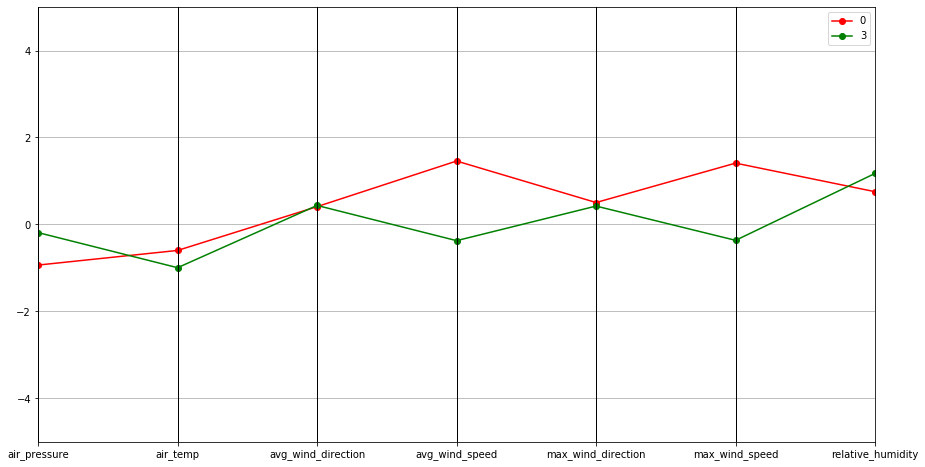

In [56]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])